[자동차 연비 예측]
- 데이터셋 : auto-mpg.csv
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : LinearRegression

1) 데이터 준비 및 feature/target 분석

In [8]:
import pandas as pd

In [9]:
data=pd.read_csv('../data/auto_mpg.csv')

In [10]:
data.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [11]:
data[data['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [12]:
idx=data[data['horsepower']=='?'].index
data=data.drop(idx).copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [13]:
data['horsepower']=data['horsepower'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


In [15]:
data.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


2) feature/target 분리

In [42]:
feature=data.iloc[:,1:7]
target=data['mpg']

print(f'feature: {feature.shape},{feature.ndim}d')
print(f'target: {target.shape},{target.ndim}d')

feature: (392, 6),2d
target: (392,),1d


In [43]:
feature

,cylinders,displacement,horsepower,weight,acceleration,model year
0,8,307.0,130,3504,12.0,70
1,8,350.0,165,3693,11.5,70
2,8,318.0,150,3436,11.0,70
3,8,304.0,150,3433,12.0,70
4,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82
394,4,97.0,52,2130,24.6,82
395,4,135.0,84,2295,11.6,82
396,4,120.0,79,2625,18.6,82


3) 데이터셋 준비

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,random_state=8)

In [20]:
print(f'x_train:{x_train.shape},{x_train.ndim}D')
print(f'y_train:{y_train.shape},{y_train.ndim}D')

print(f'x_test:{x_test.shape},{x_test.ndim}D')
print(f'y_test:{y_test.shape},{y_test.ndim}D')

x_train:(294, 6),2D
y_train:(294,),1D
x_test:(98, 6),2D
y_test:(98,),1D


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mmscaler=MinMaxScaler()

In [30]:
mmscaler.fit(x_train)

MinMaxScaler()

In [31]:
x_train_scaled=mmscaler.transform(x_train)
x_train_scaled.shape,x_train_scaled.min(),x_train_scaled.max()

((294, 6), 0.0, 1.0)

In [32]:
x_test_scaled=mmscaler.transform(x_test)
x_test_scaled.shape,x_test_scaled.min(),x_test_scaled.max()

((98, 6), -0.03105590062111796, 1.012422360248447)

4) 훈련/학습 진행

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [35]:
print(f'model.coef_: {len(model.coef_)}개, {model.coef_}')
print(f'model.intercept_: {model.intercept_}')

model.coef_: 6개, [ -2.03863727   0.98035867   0.54936047 -22.21923073   0.14250625
   8.68167234]
model.intercept_: 27.97983670984369


5) 모델 성능 평가

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [36]:
model.score(x_test_scaled,y_test)

0.7759895923171296

In [39]:
pre_data=model.predict(x_test_scaled)

mse=mean_squared_error(y_test,pre_data)
rmse=mean_squared_error(y_test,pre_data,squared=False)
mae=mean_absolute_error(y_test,pre_data)
r2=r2_score(y_test,pre_data)

In [40]:
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'mae: {mae}')
print(f'r2: {r2}')

mse: 14.16851927073645
rmse: 3.7641093595612296
mae: 2.786468900569063
r2: 0.7759895923171296


6) 시각화

In [44]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

In [45]:
print(type(x_test_scaled))

<class 'numpy.ndarray'>


In [46]:
X=x_test_scaled[:,1]
Y=x_test_scaled[:,2]
Z=y_test

In [47]:
print(X.shape, X.ndim)
print(Y.shape, Y.ndim)
print(Z.shape, Z.ndim)

(98,) 1
(98,) 1
(98,) 1


In [48]:
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)
Z=Z.values.reshape(-1,1)

In [50]:
print(f'[X] {X.shape} \n{X.ndim}d\n{X}\n')
print(f'[Y] {Y.shape} \n{Y.ndim}d\n{Y}\n')
print(f'[Z] {Z.shape} \n{Z.ndim}d\n{Z}\n')

[X] (98, 1) 
2d
[[0.18863049]
 [0.12144703]
 [1.        ]
 [0.50129199]
 [0.40568475]
 [0.0749354 ]
 [0.72868217]
 [0.22739018]
 [0.61757106]
 [0.10335917]
 [0.60465116]
 [0.18604651]
 [0.11369509]
 [0.18604651]
 [0.40568475]
 [0.05943152]
 [0.22739018]
 [0.18604651]
 [0.34108527]
 [0.13953488]
 [0.13953488]
 [0.10335917]
 [0.05943152]
 [0.05684755]
 [0.11369509]
 [0.11627907]
 [0.02842377]
 [0.47028424]
 [0.03100775]
 [0.72868217]
 [0.72868217]
 [0.75452196]
 [0.40568475]
 [0.70284238]
 [0.49095607]
 [0.05943152]
 [0.01033592]
 [0.73126615]
 [0.18604651]
 [0.10077519]
 [0.0749354 ]
 [0.72868217]
 [0.05943152]
 [0.61757106]
 [0.93281654]
 [0.0749354 ]
 [0.0749354 ]
 [0.05684755]
 [0.40568475]
 [0.60465116]
 [0.09302326]
 [0.09560724]
 [0.42118863]
 [0.47028424]
 [0.75452196]
 [0.93281654]
 [0.0749354 ]
 [0.12403101]
 [0.72868217]
 [0.34108527]
 [0.10077519]
 [0.85788114]
 [0.1369509 ]
 [0.1369509 ]
 [0.64599483]
 [0.17312661]
 [0.72868217]
 [0.0749354 ]
 [0.72868217]
 [0.6124031 ]
 [0.

In [51]:
X=np.tile(X,(1,98))
Y=np.tile(Y,(1,98))
Z=np.tile(Z,(1,98))

In [52]:
print(f'[X] {X.shape} \n{X.ndim}d\n{X}\n')
print(f'[Y] {Y.shape} \n{Y.ndim}d\n{Y}\n')
print(f'[Z] {Z.shape} \n{Z.ndim}d\n{Z}\n')

[X] (98, 98) 
2d
[[0.18863049 0.18863049 0.18863049 ... 0.18863049 0.18863049 0.18863049]
 [0.12144703 0.12144703 0.12144703 ... 0.12144703 0.12144703 0.12144703]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.64599483 0.64599483 0.64599483 ... 0.64599483 0.64599483 0.64599483]
 [0.0749354  0.0749354  0.0749354  ... 0.0749354  0.0749354  0.0749354 ]
 [0.72868217 0.72868217 0.72868217 ... 0.72868217 0.72868217 0.72868217]]

[Y] (98, 98) 
2d
[[0.13586957 0.13586957 0.13586957 ... 0.13586957 0.13586957 0.13586957]
 [0.26630435 0.26630435 0.26630435 ... 0.26630435 0.26630435 0.26630435]
 [0.97282609 0.97282609 0.97282609 ... 0.97282609 0.97282609 0.97282609]
 ...
 [0.56521739 0.56521739 0.56521739 ... 0.56521739 0.56521739 0.56521739]
 [0.1576087  0.1576087  0.1576087  ... 0.1576087  0.1576087  0.1576087 ]
 [0.42934783 0.42934783 0.42934783 ... 0.42934783 0.42934783 0.42934783]]

[Z] (98, 98) 
2d
[[27.2 27.2 27.2 ... 27.2 27.2 27.2]
 [23.  23.  23.  ... 2

In [53]:
X, Y = np.meshgrid(X, Y,sparse=True)

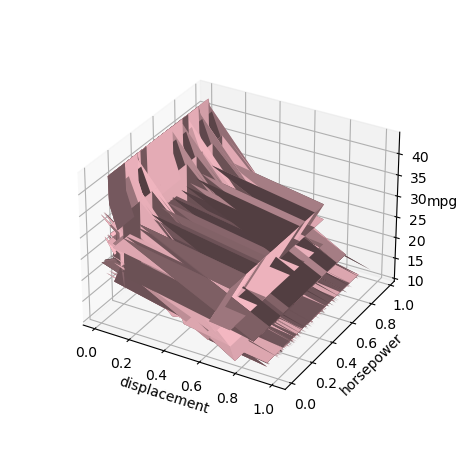

In [57]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

Z_reshaped = Z.reshape(X.shape)  
ax.plot_surface(X, Y, Z_reshaped, color='pink')
ax.set_xlabel('displacement')
ax.set_ylabel('horsepower')
ax.set_zlabel('mpg')
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.tight_layout()
plt.show()

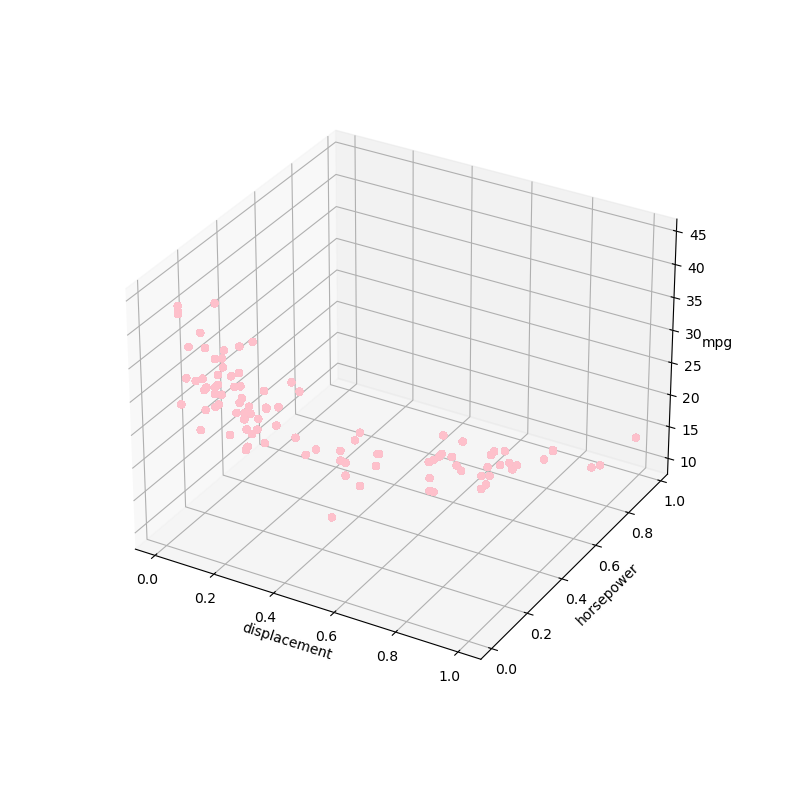

In [55]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, color='pink')
ax.set_xlabel('displacement')
ax.set_ylabel('horsepower')
ax.set_zlabel('mpg')
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.tight_layout()
plt.show()

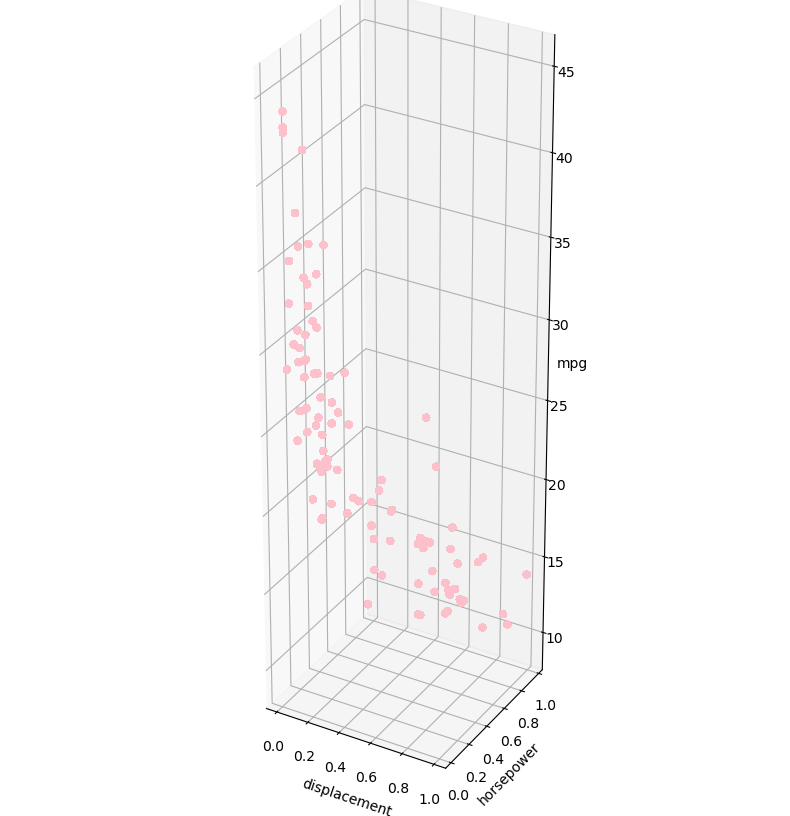

In [56]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z_reshaped, color='pink')
ax.set_xlabel('displacement')
ax.set_ylabel('horsepower')
ax.set_zlabel('mpg')
ax.set_box_aspect([(X.max()-X.min())*10,(Y.max()-Y.min())*10,Z.max()-Z.min()])
plt.tight_layout()
plt.show()